# Import Libraries

In [0]:
import torch
import numpy as np
import pandas as pd
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import transforms
from torch.autograd import Variable
from torch.nn import functional as F
from matplotlib.ticker import MultipleLocator
from matplotlib.pyplot import figure

# Constants

In [0]:
BATCH_SIZE = 32
COV_FILE = 'covtype.data'
SDD_FILE = 'SDD.txt'

# SDD Dataset

In [0]:
class SDDDataset(Dataset):
    
    def __init__(self, filename=None, X=[], y=[]):        
        if filename is not None:
            X = []
            y = []
            with open(filename) as f:
                lines = f.read().split('\n')


            for line in lines:
                if line != '':
                    splitted = line.split(' ')
                    X.append(np.array(list(map(lambda v: float(v), splitted[:-1]))))
                    y.append(int(splitted[-1]) - 1) # convert to zero-based categorical labels
            
        self.X = np.array(X)
        self.y = np.array(y)
    
    def __len__(self):
        return len(self.y)
   
    def __getitem__(self, index):
        return self.X[index], self.y[index]

In [0]:
# Split Train/Test/Val
from sklearn.model_selection import train_test_split
sdd_dataset = SDDDataset(SDD_FILE)

X_train, X_test, y_train, y_test = train_test_split(sdd_dataset.X, sdd_dataset.y, train_size=0.7, test_size=0.3)
print(len(X_train), len(X_test))

# Create Dataset Instance
sdd_train_dataset = SDDDataset(X=X_train, y=y_train)
sdd_test_dataset = SDDDataset(X=X_test, y=y_test)
sdd_train_loader = DataLoader(sdd_train_dataset, batch_size=BATCH_SIZE, shuffle=True)
sdd_test_loader = DataLoader(sdd_test_dataset, batch_size=BATCH_SIZE, shuffle=True)

40956 17553


## Checkout Data Format

In [0]:
print(len(sdd_dataset), len(sdd_dataset[0][0]))
print(sdd_dataset[0])
print(sdd_dataset[0][0])

58509 48
(array([-3.0146e-07,  8.2603e-06, -1.1517e-05, -2.3098e-06, -1.4386e-06,
       -2.1225e-05,  3.1718e-02,  3.1710e-02,  3.1721e-02, -3.2963e-02,
       -3.2962e-02, -3.2941e-02,  7.6881e-04,  2.3244e-04,  5.9982e-04,
        7.5698e-04,  2.4722e-04,  7.2498e-04,  8.9669e-01,  8.9669e-01,
        8.9669e-01,  8.9658e-01,  8.9658e-01,  8.9656e-01,  7.6804e-03,
        2.5736e-01, -7.1184e-01,  4.8789e-03, -9.5775e-02, -4.4126e-01,
       -1.3168e-03, -1.3189e-03, -1.2477e-03, -4.3777e-03, -4.3841e-03,
       -4.3893e-03, -6.6732e-01,  4.3662e+00,  6.0168e+00, -6.3308e-01,
        2.9646e+00,  8.1198e+00, -1.4961e+00, -1.4961e+00, -1.4961e+00,
       -1.4996e+00, -1.4996e+00, -1.4996e+00]), 0)
[-3.0146e-07  8.2603e-06 -1.1517e-05 -2.3098e-06 -1.4386e-06 -2.1225e-05
  3.1718e-02  3.1710e-02  3.1721e-02 -3.2963e-02 -3.2962e-02 -3.2941e-02
  7.6881e-04  2.3244e-04  5.9982e-04  7.5698e-04  2.4722e-04  7.2498e-04
  8.9669e-01  8.9669e-01  8.9669e-01  8.9658e-01  8.9658e-01  8.9656e-01

# MNIST Dataset

In [0]:
transform = transforms.Compose([
    transforms.ToTensor()
])


mnist_train_dataset = torchvision.datasets.MNIST('.', train=True, transform=transform, target_transform=None, download=True)
mnist_test_dataset = torchvision.datasets.MNIST('.', train=False, transform=transform, target_transform=None, download=True)
mnist_train_loader = DataLoader(mnist_train_dataset, batch_size=BATCH_SIZE, shuffle=True)
mnist_test_loader = DataLoader(mnist_test_dataset, batch_size=BATCH_SIZE, shuffle=True)
print(len(mnist_train_dataset), len(mnist_test_dataset))

60000 10000


## Checkout Data Format

torch.Size([32, 1, 28, 28])
torch.Size([32])


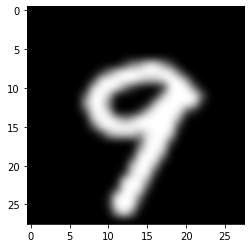

tensor(9)


In [0]:
# Checkout Data Format
# from PIL import Image as im
import cv2
from matplotlib import pyplot as plt

dataiter = iter(mnist_train_loader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

plt.imshow(images[0].reshape((28, 28)), cmap = 'gray', interpolation = 'bicubic')
plt.show()
print(labels[0])

# Cover Dataset

In [0]:
class CoverDataset(Dataset):
    
    def __init__(self, filename=None, X=[], y=[]):        
        if filename is not None:
            X = []
            y = []
            with open(filename) as f:
                lines = f.read().split('\n')


            for line in lines:
                if line != '':
                    splitted = line.split(',')
                    X.append(np.array(list(map(lambda v: float(v), splitted[:-1]))))
                    y.append(int(splitted[-1]) - 1) # convert to zero-based categorical labels
            
        self.X = np.array(X)
        self.y = np.array(y)
    
    def __len__(self):
        return len(self.y)
   
    def __getitem__(self, index):
        return self.X[index], self.y[index]

In [0]:
# Split Train/Test/Val
from sklearn.model_selection import train_test_split

cover_dataset = CoverDataset(COV_FILE)
X_train, X_test, y_train, y_test = train_test_split(cover_dataset.X, cover_dataset.y, train_size=0.7, test_size=0.3)
print(len(X_train), len(X_test))

# Create Dataset Instance
cover_train_dataset = CoverDataset(X=X_train, y=y_train)
cover_test_dataset = CoverDataset(X=X_test, y=y_test)
cover_train_loader = DataLoader(cover_train_dataset, batch_size=BATCH_SIZE, shuffle=True)
cover_test_loader = DataLoader(cover_test_dataset, batch_size=BATCH_SIZE, shuffle=True)

406708 174304


## Checkout Data Format

In [0]:
# print(len(cover_dataset), len(cover_dataset[0][0]))
# print(cover_dataset[0])
# print(cover_dataset[0][0])

dataiter = iter(cover_train_loader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([32, 54])
torch.Size([32])


# Build Model

In [0]:
# Build Feed Forward Network
class FeedForwardNetwork(torch.nn.Module):
    def __init__(self, input_dim, num_classes):
        self.input_dim = input_dim
        super(FeedForwardNetwork, self).__init__()
        self.hidden_dim = 32
        self.ff1 = torch.nn.Linear(input_dim, self.hidden_dim)
        self.ff2 = torch.nn.Linear(self.hidden_dim, self.hidden_dim)
        self.out = torch.nn.Linear(self.hidden_dim, num_classes)

    def forward(self, x):
        return torch.nn.Sequential(
                self.ff1,
                torch.nn.ReLU(),
                self.ff2,
                torch.nn.ReLU(),
                self.out
        )(x.view(-1, self.input_dim))
      

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torch.nn import functional as F

#build multinomial logistic regression model
class MNL(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(MNL, self).__init__()
    self.linear = torch.nn.Linear(input_dim, output_dim)

  def forward(self, x):
    outputs = self.linear(x)
    return outputs

# Non-deep learning baseline

In [0]:
def train(model, input_data,test_data, optim, loss_func, EPOCHS=10, reg_lambda=None, reg_type='l1'):
    episode_loss = 0
    plot_loss = []
    plot_accuracy = []
    model.train()
    for ep in range(1, EPOCHS+1):
        correct = 0
        for idx, data in enumerate(input_data):   
            X_, y_ = data[0].type(torch.float32), data[1].type(torch.long)
            X_ = X_.view(X_.size()[0],-1)
            y_pred = model.forward(X_)
            loss = loss_func(y_pred, y_)
        
            # Add custom regularization term
            if reg_lambda is not None:
                reg_term = torch.tensor(0., requires_grad=True)          
                if reg_type == 'l1':
                  for W in model.parameters():      #tensor.norm() 
                    reg_term = reg_term + W.norm(1)
                elif reg_type == 'l2':
                  for W in model.parameters():
                    reg_term = reg_term + torch.pow(W.norm(2), 2)
                  reg_term = torch.sqrt(reg_term) 
                
                loss += reg_lambda * reg_term
                
            episode_loss += loss.item()
            
            y_pred = torch.argmax(y_pred, axis=1)
            correct += np.sum(y_pred.detach().numpy() == y_.detach().numpy())

            optim.zero_grad()
            loss.backward()
            optim.step()
            
        ep_loss = episode_loss / len(input_data.dataset)
        ep_accuracy = correct / len(input_data.dataset) 
        plot_loss.append(ep_loss)
        plot_accuracy.append(ep_accuracy)
        episode_loss = 0
    
        loss, accuracy = evaluate(model, test_data, loss_function)
        print('ep: ', ep, ' elu loss: ',loss, ' elu accuracy: ', accuracy)

In [0]:
# Evaluate
def evaluate(model_, input_data, loss):
    model_.eval()
    with torch.no_grad():
        correct = 0
        ep_loss = 0
        ep_accuracy = 0
        episode_loss = 0
        for idx, data in enumerate(input_data):
            X_, y_ = data[0].type(torch.float32), data[1].type(torch.long)
            X_ = X_.view(X_.size()[0],-1)
            y_pred = model_.forward(X_)
            
            loss_ = loss(y_pred, y_)
            episode_loss += loss_.item()

            y_pred = torch.argmax(y_pred, axis=1)
            correct += np.sum(y_pred.detach().numpy() == y_.detach().numpy())
            
        ep_loss = episode_loss / len(input_data.dataset)
        ep_accuracy = correct / len(input_data.dataset)
    return ep_loss, ep_accuracy

In [0]:
loss_function = torch.nn.CrossEntropyLoss()
result = {}
model = MNL(54, 7)
lr = 1e-4
optim = torch.optim.Adam(model.parameters(), lr=lr)
reg = 0.1
train(model, cover_train_loader,cover_test_loader, optim, loss_function, EPOCHS=10, reg_lambda=reg, reg_type='l1')
#loss, accuracy = evaluate(model, cover_test_loader, loss_function)


ep:  1  elu loss:  0.027319165105343806  elu accuracy:  0.6653490453460621
ep:  2  elu loss:  0.026249201947965765  elu accuracy:  0.644701211676152
ep:  3  elu loss:  0.0277624208046175  elu accuracy:  0.6233706627501376
ep:  4  elu loss:  0.02700124476641849  elu accuracy:  0.6608798421149257
ep:  5  elu loss:  0.02738098642881669  elu accuracy:  0.612275105562695
ep:  6  elu loss:  0.0277285349413572  elu accuracy:  0.6500596658711217
ep:  7  elu loss:  0.028096005749706283  elu accuracy:  0.6392853864512575
ep:  8  elu loss:  0.025599724770772724  elu accuracy:  0.6750619607123187
ep:  9  elu loss:  0.025859003735776997  elu accuracy:  0.6661465026620158
ep:  10  elu loss:  0.0336210993950397  elu accuracy:  0.5083991187809803


In [0]:
loss_function = torch.nn.CrossEntropyLoss()
result = {}
model = MNL(784, 10)
lr = 1e-4
optim = torch.optim.Adam(model.parameters(), lr=lr)
reg = 0.1
train(model, mnist_train_loader,mnist_test_loader, optim, loss_function, EPOCHS=10, reg_lambda=reg, reg_type='l2')

ep:  1  elu loss:  0.022483041512966154  elu accuracy:  0.8634
ep:  2  elu loss:  0.0176178922355175  elu accuracy:  0.8816
ep:  3  elu loss:  0.01619058762639761  elu accuracy:  0.8889
ep:  4  elu loss:  0.015624389216303826  elu accuracy:  0.8917
ep:  5  elu loss:  0.015323083113133908  elu accuracy:  0.8921
ep:  6  elu loss:  0.015170720106363297  elu accuracy:  0.8939
ep:  7  elu loss:  0.01507567046135664  elu accuracy:  0.8938
ep:  8  elu loss:  0.015036766570806503  elu accuracy:  0.8961
ep:  9  elu loss:  0.015011443389952183  elu accuracy:  0.8934
ep:  10  elu loss:  0.014999215734004975  elu accuracy:  0.8953


In [0]:
loss_function = torch.nn.CrossEntropyLoss()
result = {}
model = MNL(48, 11)
lr = 1e-3
optim = torch.optim.Adam(model.parameters(), lr=lr)
reg = 0.001
train(model, sdd_train_loader,sdd_test_loader, optim, loss_function, EPOCHS=10, reg_lambda=reg, reg_type='l2')

ep:  1  elu loss:  0.06919225967012566  elu accuracy:  0.3400558309120948
ep:  2  elu loss:  0.06431762074525015  elu accuracy:  0.4212385347234091
ep:  3  elu loss:  0.06095698935445106  elu accuracy:  0.48396285535236144
ep:  4  elu loss:  0.058220355577131476  elu accuracy:  0.5128468068136501
ep:  5  elu loss:  0.055510626086168385  elu accuracy:  0.525608158149604
ep:  6  elu loss:  0.05355441177060433  elu accuracy:  0.5715262348316527
ep:  7  elu loss:  0.05145102499258428  elu accuracy:  0.5828633282060046
ep:  8  elu loss:  0.04979593260895525  elu accuracy:  0.6087848231071612
ep:  9  elu loss:  0.04857393287834072  elu accuracy:  0.5995556315159801
ep:  10  elu loss:  0.04706628861294467  elu accuracy:  0.6280977610664844


# Training Functions

In [0]:
# Training
def train(model, input_data, optim, loss_func, EPOCHS=10, reg_lambda=None, reg_type='l1'):
    episode_loss = 0
    plot_loss = []
    plot_accuracy = []
    model.train()
    for ep in range(1, EPOCHS+1):
        correct = 0
        for idx, data in enumerate(input_data):   
            X_, y_ = data[0].type(torch.float32), data[1].type(torch.long)
            y_pred = model.forward(X_)
            loss = loss_func(y_pred, y_)
        
            # Add custom regularization term
            if reg_lambda is not None:
                reg_term = torch.tensor(0., requires_grad=True)
                for W in model.parameters():
                    if reg_type == 'group_lasso':
                        reg_term = reg_term + np.sqrt(W.shape[0]) * W.norm(2)                    
                    elif reg_type == 'l1':
                        reg_term = reg_term + W.norm(1)
                    elif reg_type == 'sparse_group_lasso':
                        reg_term = reg_term + np.sqrt(W.shape[0]) * W.norm(2) + W.norm(1)

                loss += reg_lambda * reg_term
                
            episode_loss += loss.item()
            
            y_pred = torch.argmax(y_pred, axis=1)
            correct += np.sum(y_pred.detach().numpy() == y_.detach().numpy())

            optim.zero_grad()
            loss.backward()
            optim.step()
            
        ep_loss = episode_loss / len(input_data.dataset)
        ep_accuracy = correct / len(input_data.dataset)
#         print('Train EP: {} | Loss: {:.4f} | Accuracy: {:.3f}'.format(ep, ep_loss, ep_accuracy))    
        plot_loss.append(ep_loss)
        plot_accuracy.append(ep_accuracy)
        episode_loss = 0
    
    
    # Return non-zero neurons
    total = 0
    non_zero = 0
    for W in model.parameters():
        weights = np.array(W.data)
#         print(weights[(weights < -1e-7) | (weights > 1e-7)].ravel())
        non_zero += len(weights[(weights < -1e-7) | (weights > 1e-7)].ravel())
        total += len(weights.ravel())
#         print(f'Non-zero neurons: {non_zero}/{total}')
        
    return plot_loss, plot_accuracy, f'{non_zero}/{total}'

In [0]:
# Evaluate
def evaluate(model_, input_data, loss):
    model_.eval()
    with torch.no_grad():
        correct = 0
        ep_loss = 0
        ep_accuracy = 0
        episode_loss = 0
        for idx, data in enumerate(input_data):
            X_, y_ = data[0].type(torch.float32), data[1].type(torch.long)
#             X_, y_ = torch.tensor(data[0],dtype=torch.float32), torch.tensor(data[1], dtype=torch.long)
            y_pred = model_.forward(X_)
            
            loss_ = loss(y_pred, y_)
            episode_loss += loss_.item()

            y_pred = torch.argmax(y_pred, axis=1)
            correct += np.sum(y_pred.detach().numpy() == y_.detach().numpy())
            
        ep_loss = episode_loss / len(input_data.dataset)
        ep_accuracy = correct / len(input_data.dataset)
        
#         print('Test | Loss: {:.4f} | Accuracy: {:.3f}'.format(ep_loss, ep_accuracy))
    return ep_loss, ep_accuracy

In [0]:
# Plot
def plot_graph(loss, accuracy, title, file, prefix):
    fig, axs = plt.subplots(2, 1, figsize=(6,10), dpi=80)
    
    axs[0].set_title(title)
    axs[0].plot(list(range(len(accuracy))), accuracy, label='accuracy', color='blue')
    axs[0].yaxis.set_major_locator(plt.MaxNLocator(10))
    axs[0].xaxis.set_major_locator(plt.MaxNLocator(20, integer=True))
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Episodes')
    axs[0].legend()
    
    axs[1].plot(list(range(len(loss))), loss, label='loss', color='red')
    axs[1].yaxis.set_major_locator(plt.MaxNLocator(10))
    axs[1].xaxis.set_major_locator(plt.MaxNLocator(20, integer=True))
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Episodes')
    axs[1].legend()
    plt.savefig(f'{prefix}_{file}.png')
    plt.close()
#     plt.show()

# Run Function

In [0]:
def runner(prefix, optimizer, name, train_data, test_data, num_features, num_classes, EP=20, reg_type='l1'):    
    loss_function = torch.nn.CrossEntropyLoss()
    LR = [5e-3, 1e-3, 1e-4]
#     REG = [0, 1e-3, 1e-4, 1e-5]
    REG = [1e-3, 1e-4, 1e-5]
    results = []
    for lr in LR:
        for reg in REG:
            result = {}
            ff_network = FeedForwardNetwork(num_features, num_classes)
            if reg_type == 'l2':
                optim = optimizer(ff_network.parameters(), lr=lr, weight_decay=reg)
            else:
                optim = optimizer(ff_network.parameters(), lr=lr)
            loss, accuracy, non_zero = train(ff_network, train_data, optim, loss_function, EPOCHS=EP, reg_lambda=reg, reg_type=reg_type)
            result = {
                'type': 'train',
                'model': 'ff',
                'lr': lr,
                'optim': name,
                'reg_type': reg_type,
                'reg_lambda': reg,
                'loss': loss[-1],
                'accuracy': accuracy[-1],
                'non_zero_neurons': non_zero
            }
            results.append(result)
            plot_graph(loss, accuracy, title=f'LR: {lr} | Optimizer: {name}\nReg: {reg_type} | Lambda: {reg}', file=f'ff_{lr}_{name}_{reg_type}_{reg}', prefix=prefix)
            loss, accuracy = evaluate(ff_network, test_data, loss_function)
            result = {
                'type': 'test',
                'model': 'ff',
                'lr': lr,
                'optim': name,
                'reg_type': reg_type,
                'reg_lambda': reg,
                'loss': loss,
                'accuracy': accuracy
            }
            results.append(result)
    return results

In [0]:
import json

def write_results(prefix, results):
    with open(f'{prefix}_results.json', 'w') as f:
        json.dump(results, f, indent=4)

# SDD Run

In [0]:
OPTIM = [
    (torch.optim.Adam, 'Adam'),
    (torch.optim.RMSprop, 'RMSprop'),
    (torch.optim.SGD, 'SGD'),
    (torch.optim.Adamax, 'AdaMax'),
]
results = []
num_features = len(sdd_dataset[0][0])
print(f'Num Features: {num_features}')
REG_TYPES = ['sparse_group_lasso', 'group_lasso']
for reg_type in REG_TYPES:
    for optim in OPTIM:
        results += runner('sdd', optim[0], optim[1], sdd_train_loader, sdd_test_loader, num_features=num_features, num_classes=11, reg_type=reg_type)

write_results('sdd', results)

Num Features: 48


# MNIST Run

In [0]:
OPTIM = [
    (torch.optim.Adam, 'Adam'),
    (torch.optim.RMSprop, 'RMSprop'),
    (torch.optim.SGD, 'SGD'),
    (torch.optim.Adamax, 'AdaMax'),
]
dataiter = iter(mnist_train_loader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

num_features = images.shape[2]*images.shape[3]
num_classes = 10
results = []
REG_TYPES = ['sparse_group_lasso', 'group_lasso']
for reg_type in REG_TYPES:
    for optim in OPTIM:
        results += runner('mnist', optim[0], optim[1], mnist_train_loader, mnist_test_loader, num_features=num_features, num_classes=num_classes, reg_type=reg_type)

write_results('mnist', results)

<class 'torch.Tensor'>
torch.Size([32, 1, 28, 28])
torch.Size([32])
Train EP: 1 | Loss: 0.0129 | Accuracy: 0.889
Train EP: 2 | Loss: 0.0068 | Accuracy: 0.939
Train EP: 3 | Loss: 0.0054 | Accuracy: 0.954
Train EP: 4 | Loss: 0.0046 | Accuracy: 0.961
Train EP: 5 | Loss: 0.0040 | Accuracy: 0.967
Train EP: 6 | Loss: 0.0037 | Accuracy: 0.970
Train EP: 7 | Loss: 0.0034 | Accuracy: 0.972
Train EP: 8 | Loss: 0.0031 | Accuracy: 0.975
Train EP: 9 | Loss: 0.0029 | Accuracy: 0.977
Train EP: 10 | Loss: 0.0028 | Accuracy: 0.978
Train EP: 11 | Loss: 0.0026 | Accuracy: 0.980
Train EP: 12 | Loss: 0.0025 | Accuracy: 0.981
Train EP: 13 | Loss: 0.0024 | Accuracy: 0.982
Train EP: 14 | Loss: 0.0023 | Accuracy: 0.983
Train EP: 15 | Loss: 0.0022 | Accuracy: 0.984
Train EP: 16 | Loss: 0.0021 | Accuracy: 0.985
Train EP: 17 | Loss: 0.0021 | Accuracy: 0.985
Train EP: 18 | Loss: 0.0020 | Accuracy: 0.986
Train EP: 19 | Loss: 0.0019 | Accuracy: 0.987
Train EP: 20 | Loss: 0.0019 | Accuracy: 0.987
Non-zero neurons: 250

# Cover Run

In [0]:
OPTIM = [
    (torch.optim.Adam, 'Adam'),
    (torch.optim.RMSprop, 'RMSprop'),
    (torch.optim.SGD, 'SGD'),
    (torch.optim.Adamax, 'AdaMax'),
]

results = []
for optim in OPTIM:
    results += runner('cover', optim[0], optim[1], cover_train_loader, cover_test_loader, num_features=len(cover_dataset[0][0]), num_classes=7)

write_results('cover', results)